# Convolution-Neural-Network

 A convolution neural network is a class of deep neural network most commonly applied to analyzing visual imagery. They are also known as shift invariant or space invariant artificial neural networks (SIANN), based on their shared-weights architecture and translation invariance characteristics.

 Convolutional networks were inspired by biological processes in that the connectivity pattern between neurons resembles the organization of the animal visual cortex.

Individual cortical neurons respond to stimuli only in a restricted region of the visual field known as the receptive field. The receptive fields of different neurons partially overlap such that they cover the entire visual field.

## Stride
Stride is a component of convolutional neural networks (CNNs) that performs a convolution operation on the input data. Stride can be seen as a parameter of the convolution kernel that modifies the amount of movement over the image or video when the kernel is applied to it.

## Padding
 Padding is a term in computer science, used to refer to the process of preparing data for transmission over a network. This involves adding extra data to the output of an algorithm to improve the speed of network transmission.

 Droping the data from the edges of the image is called padding.
 
## Non Linearity
### ReLu - Rectified Linear Unit
ReLU is the most commonly used activation function in neural networks, especially in CNNs. ReLU is linear (identity) for all positive values, and zero for all negative values. The function and its derivative both are monotonic. ReLU is half-rectified (from bottom). f(x) is zero when x is less than zero and f(x) is equal to x when x is above or equal to zero.

### Pooling
 Pooling is a sample-based discretization process. The main purpose of pooling is to reduce the size of the input. This is done by summarizing the features present in a region of the feature map generated by a convolution layer. Pooling can be of different types, namely, max, average, sum, etc.

    Max Pooling:
     - Max pooling is a pooling operation that selects the maximum element from the region of the feature map covered by the filter. Thus, the output after max-pooling layer would be an array of size 2x2x1.
     Average Pooling:
           - Average pooling is a pooling operation that selects the average value from the region of the feature map covered by the filter. Thus, the output after average-pooling layer would be an array of size 2x2x1.
     Sum Pooling:
      - Sum pooling is a pooling operation that selects the sum value from the region of the feature map covered by the filter. Thus, the output after sum-pooling layer would be an array of size 2x2x1.

In [1]:
# ! pip install tensorflow
# ! pip install keras


# ! pip install ipykernel


  Using cached tensorflow-2.13.0-cp311-cp311-win_amd64.whl (1.9 kB)



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import os

import sys
sys.version




'3.11.3 (tags/v3.11.3:f3909b8, Apr  4 2023, 23:49:59) [MSC v.1934 64 bit (AMD64)]'

In [2]:
# read train and test data
train = pd.read_csv('MNISTtrain.csv')
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test = pd.read_csv('MNISTtest.csv')
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# put labels into y_train variable
y_train = train["label"]
# Drop 'label' column
x_train = train.drop(labels = ["label"],axis = 1)

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

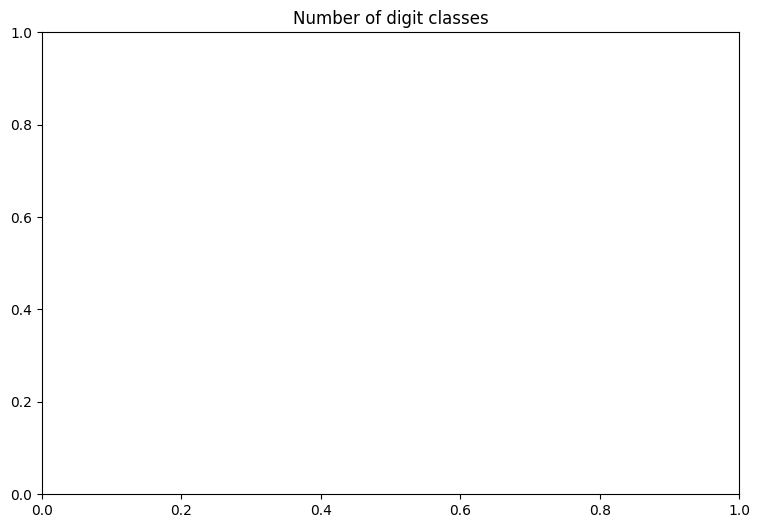

In [5]:
# visualize number of digits classes
plt.figure(figsize=(9,6))
# g = sns.countplot(y_train, palette="icefire")
plt.title("Number of digit classes")
y_train.value_counts()

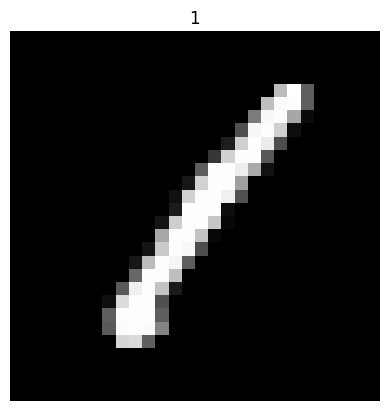

In [6]:
import matplotlib.pyplot as plt

# Assuming x_train is a DataFrame and the first column contains image data
img = x_train.iloc[0].values
img = img.reshape((28, 28))

plt.imshow(img, cmap='gray')
plt.title(train.iloc[0, 0])
plt.axis("off")
plt.show()


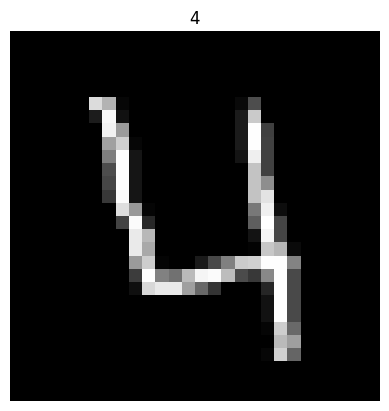

In [7]:
# plot some samples
img = x_train.iloc[3].values
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[3,0])
plt.axis("off")
plt.show()

# Normalization , Reshape and Label Encoding
       Normalization
            We perform a grayscale normalization to reduce the effect of illumination's differences.
            If we perform normalization, CNN works faster.
      
       Reshape
            Train and test images (28 x 28)
            We reshape all data to 28x28x1 3D matrices.
            Keras needs an extra dimension in the end which correspond to channels. Our images are gray scaled so it use only one channel.
      
       Label Encoding
            Encode labels to one hot vectors
            2 => [0,0,1,0,0,0,0,0,0,0]
            4 => [0,0,0,0,1,0,0,0,0,0]

In [8]:
# Normalize the data
X_train = x_train/255.0
test = test/255.0
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)


x_train shape:  (42000, 784)
test shape:  (28000, 784)


In [9]:
# Reshape

X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 28, 28, 1)
test shape:  (28000, 28, 28, 1)


In [10]:
# Label Encoding
from tensorflow.keras.utils import to_categorical

# Assuming Y_train is your target variable in a numerical format (e.g., [0, 1, 2, 3, ...])
Y_train = to_categorical(y_train, num_classes=10) # number of classes = 10


In [11]:
# Train Test Split

In [12]:
# Split the train and the validation set for the fitting
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)


x_train shape (37800, 28, 28, 1)
x_test shape (4200, 28, 28, 1)
y_train shape (37800, 10)
y_test shape (4200, 10)


- CNN
      - Define the model
      - Set the optimizer and annealer
      - Data augmentation
      - Fit the model

    - CNN is used for image classification, object detection
    - CNN is also called as Convolutional Neural Network


# What is Convolution Operation?
      - We have some image and feature detector(3*3)
      - Feature detector does not need to be 3 by 3 matrix. It can be 5 by 5 or 7 by 7
      - Feature detector = kernel = filter
      - Feature detector detects features like edges or convex shapes
      - feature map = conv(input image, feature detector). Element wise multiplication of matrices
      - Stride = navigating in input image
      - We reduce the size of image. This is important bc code runs faster. However, we lost information.
      - We create multiple feature maps bc we use multiple feature detectors(filters)
      - Lets look at gimp. Edge detect and emboss filters. These are feature detectors.
      - After having convolution layer we use ReLU to break up linearity. Increase nonlinearity. Because images are non linear.
      
      
      # Pooling: reduces the size of image. There are 2 types of pooling, max pooling and average pooling. Pooling avoid overfitting.
      - Flattening: 
            - converts matrix to vector.
            - We flatten the matrix after convolution and pooling steps. After that we use artificial neural network to classify the images.
      - We use dense layer in order to connect artificial neural network
      - Max pooling: takes maximum value from the image
            - it makes the image smaller
            - it is used for reducing the complexity of the model and avoid overfitting
      # Fully Connected Layer
      # Neurons in a fully connected layer have full connections to all activations in the previous layer, as seen in regular Neural Networks.
            - Artificial Neural Network
            - Flatten
            - Dense
            - Softmax

In [13]:

from sklearn.metrics import confusion_matrix
import itertools

from keras.utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()
#
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

# Define the optimizer
      - Adam optimizer: Change the learning rate

In [14]:
# optimizer
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

# Compile the model
      - categorical_crossentropy: loss function
      - metrics=['accuracy']: to see accuracy rate while fitting the model
# multi-class-classification : when one hot encoding is used

In [15]:
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])


In [16]:
epochs = 10  # for better result increase the epochs
batch_size = 250

In [17]:
# data augmentation

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0 
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std 
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0.5,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.5, # Randomly zoom image 
        width_shift_range=0.5,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.5,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

In [18]:
# Fit the model

# Fit the model
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/10
151/151 - 43s - loss: 2.1638 - accuracy: 0.2002 - val_loss: 1.5931 - val_accuracy: 0.4581 - 43s/epoch - 285ms/step
Epoch 2/10
151/151 - 42s - loss: 1.8524 - accuracy: 0.3420 - val_loss: 1.0723 - val_accuracy: 0.7531 - 42s/epoch - 277ms/step
Epoch 3/10
151/151 - 46s - loss: 1.6824 - accuracy: 0.4109 - val_loss: 0.8357 - val_accuracy: 0.7881 - 46s/epoch - 307ms/step
Epoch 4/10
151/151 - 44s - loss: 1.5717 - accuracy: 0.4563 - val_loss: 0.6122 - val_accuracy: 0.8581 - 44s/epoch - 291ms/step
Epoch 5/10
151/151 - 46s - loss: 1.5166 - accuracy: 0.4770 - val_loss: 0.5464 - val_accuracy: 0.8583 - 46s/epoch - 307ms/step
Epoch 6/10
151/151 - 49s - loss: 1.4527 - accuracy: 0.5005 - val_loss: 0.4564 - val_accuracy: 0.8838 - 49s/epoch - 326ms/step
Epoch 7/10
151/151 - 51s - loss: 1.4298 - accuracy: 0.5100 - val_loss: 0.4070 - val_accuracy: 0.8969 - 51s/epoch - 341ms/step
Epoch 8/10
151/151 - 44s - loss: 1.3833 - accuracy: 0.5274 - val_loss: 0.3808 - val_accuracy: 0.9000 - 44s/epoch - 294

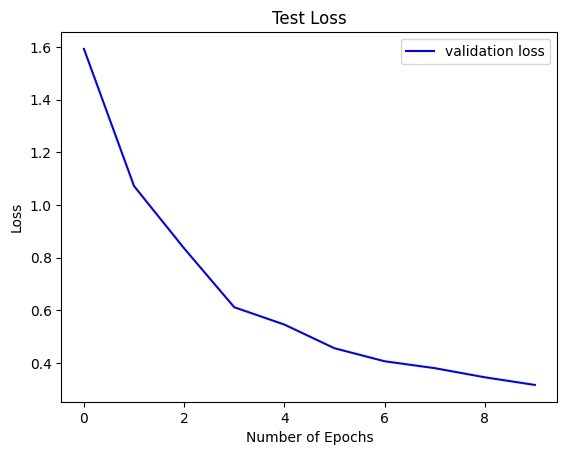

In [19]:
# Plot the loss and accuracy curves for training and validation
plt.plot(history.history['val_loss'], color='b', label="validation loss") # validation loss
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend() # legend is used to show labels
plt.show()


132/132 [==============================] - 1s 8ms/step


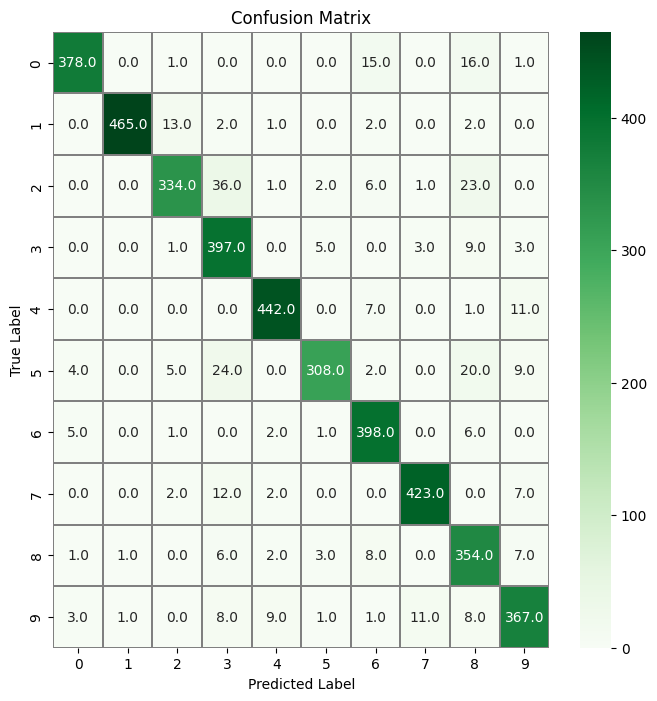

In [20]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)

# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)

# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1)

# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
